# Image Classification with CNN - LeNet5 architecture

In this exercise, we will apply the LeNet5 algorithm to the Fashion MNIST dataset and improve your performances.

We will first download the data:

In [1]:
# TODO: Load the dataset
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# # # If your computer is slow, try to use a subset of data, e.g.
# X_train = X_train[:10000]
# y_train = y_train[:10000]
# X_test = X_test[:2000]
# y_test = y_test[:2000]
X_train.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

As you already know, this dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

You can have a look at some images if needed, even if you already know them.

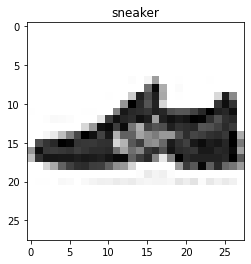

In [15]:
# TODO: Explore the data, display some input images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap="gray_r")
plt.title(label_class[y_train[idx]])
plt.show()

Make the data preparation and preprocessing: scale and reshape the data, put the labels to the good shape.

In [16]:
# TODO: Make the data preparation
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

X_train_norm = X_train/255
X_test_norm = X_test/25


X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], 28, 28,1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], 28, 28,1)

X_train_norm.shape #Should be (60000, 28, 28, 1)

(60000, 28, 28, 1)

Now build the LeNet5 architecture. You can reuse the one of the course, or try to build it by yourself.

The architecture is the following:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1WteTU2FPIVMkBKmMxGpFm5OjsX-szTbB">
</p>

In [17]:
# TODO: Build your model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense


def lenet5():
    
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, name='C1', kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2), name='S2'))
    # Layer C3
    model.add(Conv2D(filters=16, name='C3', kernel_size=(3, 3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2), name='S4'))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(120, name='C5', activation ='relu'))
    # Layer F6
    model.add(Dense(84, name= 'F6', activation ='relu'))
    # Output layer
    model.add(Dense(units=10, activation = 'softmax'))
    
    return model

lenet5().summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 26, 26, 6)         60        
                                                                 
 S2 (MaxPooling2D)           (None, 13, 13, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 11, 11, 16)        880       
                                                                 
 S4 (MaxPooling2D)           (None, 5, 5, 16)          0         
                                                                 
 flatten_8 (Flatten)         (None, 400)               0         
                                                                 
 C5 (Dense)                  (None, 120)               48120     
                                                                 
 F6 (Dense)                  (None, 84)               

Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [18]:
# TODO: Compile and fit your model
import os

# os.environ['KMP_DUPLICATE_LIB_OK']='True' #https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

model = lenet5()

model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Define now our callbacks
# callbacks = [EarlyStopping(monitor='val_loss', patience=10), TensorBoard(log_dir='./keras-logs', histogram_freq=0, write_graph=True, write_images=True)]
callbacks = [EarlyStopping(monitor='val_loss', patience=10)]

# Finally fit the model
model.fit(x=X_train_norm, y=y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=100, batch_size=2048, callbacks=callbacks)

Epoch 1/100
30/30 [==============================] - 2s 36ms/step - loss: 1.6271 - accuracy: 0.4932 - val_loss: 3.7205 - val_accuracy: 0.6155
Epoch 2/100
30/30 [==============================] - 1s 25ms/step - loss: 0.8207 - accuracy: 0.7016 - val_loss: 3.5611 - val_accuracy: 0.7081
Epoch 3/100
30/30 [==============================] - 1s 25ms/step - loss: 0.6577 - accuracy: 0.7578 - val_loss: 3.1910 - val_accuracy: 0.7499
Epoch 4/100
30/30 [==============================] - 1s 25ms/step - loss: 0.5824 - accuracy: 0.7845 - val_loss: 3.0988 - val_accuracy: 0.7681
Epoch 5/100
30/30 [==============================] - 1s 25ms/step - loss: 0.5287 - accuracy: 0.8098 - val_loss: 2.9271 - val_accuracy: 0.7834
Epoch 6/100
30/30 [==============================] - 1s 25ms/step - loss: 0.4954 - accuracy: 0.8232 - val_loss: 2.9195 - val_accuracy: 0.7917
Epoch 7/100
30/30 [==============================] - 1s 25ms/step - loss: 0.4775 - accuracy: 0.8313 - val_loss: 2.4825 - val_accuracy: 0.8121
Epoch 

Have a look at the tensorboard and see if it gives a deeper understanding of your model.

Compute then the accuracy of your model. Is it better than a regular MLP used before?

In [19]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size = 1024
y_pred_train = to_categorical(model.predict(X_train).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test_cat))

accuracy on train with NN: 0.8288333333333333
accuracy on test with NN: 0.82


We will now add image augmentation to improve our results, especially we will try to reduce overfitting this way.

To do so, you can use `ImageDataGenerator` from Keras that makes all the work for you (including rescaling), with the following parameter: 
* `horizontal_flip=True`

For more info about how the `ImageDataGenerator` works, you can check out [this article](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/).

Begin by creating an object `ImageDataGenerator` with this parameter.

In [20]:
# TODO: Instantiate an ImageDataGenerator object
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True)

Finally, you can train your model using this generator, with the method `fit_generator` of your model and the method `flow` of your `ImageDataGenerator`.

In [24]:
# TODO: train your model
# was crashing before doing 100 epochs
batch_size = 1024
model.fit_generator(datagen.flow(X_train_norm, y_train_cat, batch_size=batch_size),
                    validation_data=(X_test_norm, y_test_cat), callbacks=callbacks,
                    steps_per_epoch=len(X_train_norm) / batch_size, epochs=100)

Epoch 1/100
 3/58 [>.............................] - ETA: 1s - loss: 0.2566 - accuracy: 0.9043

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


58/58 [==============================] - 3s 54ms/step - loss: 0.2685 - accuracy: 0.9011 - val_loss: 3.3355 - val_accuracy: 0.7860
Epoch 2/100
58/58 [==============================] - 3s 53ms/step - loss: 0.2659 - accuracy: 0.9026 - val_loss: 3.5401 - val_accuracy: 0.7761
Epoch 3/100
58/58 [==============================] - 3s 52ms/step - loss: 0.2637 - accuracy: 0.9036 - val_loss: 3.3546 - val_accuracy: 0.7833
Epoch 4/100
58/58 [==============================] - 3s 45ms/step - loss: 0.2613 - accuracy: 0.9045 - val_loss: 3.5076 - val_accuracy: 0.7798
Epoch 5/100
58/58 [==============================] - 3s 53ms/step - loss: 0.2619 - accuracy: 0.9049 - val_loss: 3.4311 - val_accuracy: 0.7862
Epoch 6/100
58/58 [==============================] - 3s 46ms/step - loss: 0.2575 - accuracy: 0.9050 - val_loss: 3.8634 - val_accuracy: 0.7693
Epoch 7/100
58/58 [==============================] - 3s 46ms/step - loss: 0.2558 - accuracy: 0.9058 - val_loss: 2.9765 - val_accuracy: 0.8008
Epoch 8/100
58/58 

Recompute the accuracy of your model, does it improve your performances with data augmentation?

In [22]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size=1024
y_pred_train = to_categorical(model.predict(X_train).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test_cat))

accuracy on train with NN: 0.7742
accuracy on test with NN: 0.7621


You can now try to improve even more your results. For example, add more parameters to your `ImageDataGenerator`, play with some hyperparameters, and so on...